In [18]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/Dojo2024/Real-Estate-End-to-End-application-Using-DASH/refs/heads/main/Real_Estate.csv"
real_estate_data = pd.read_csv(url)


In [19]:
real_estate_data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [20]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [21]:
real_estate_data['House age'] = real_estate_data['House age'].astype(int)
real_estate_data['Distance to the nearest MRT station'] = real_estate_data['Distance to the nearest MRT station'].astype(float)
real_estate_data['House price of unit area'] = real_estate_data['House price of unit area'].astype(int)



In [22]:
real_estate_data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [23]:
real_estate_data.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.992754,1064.468233,4.265700,24.973605,121.520268,28.628019
std,11.673419,1196.749385,2.880498,0.024178,0.026989,15.674096
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.000000,289.324800,2.000000,24.952422,121.496866,18.000000
50%,16.000000,506.114400,5.000000,24.974353,121.520912,30.000000
75%,30.000000,1454.279000,6.750000,24.994947,121.544676,40.000000
max,42.000000,6306.153000,10.000000,25.014578,121.565321,65.000000


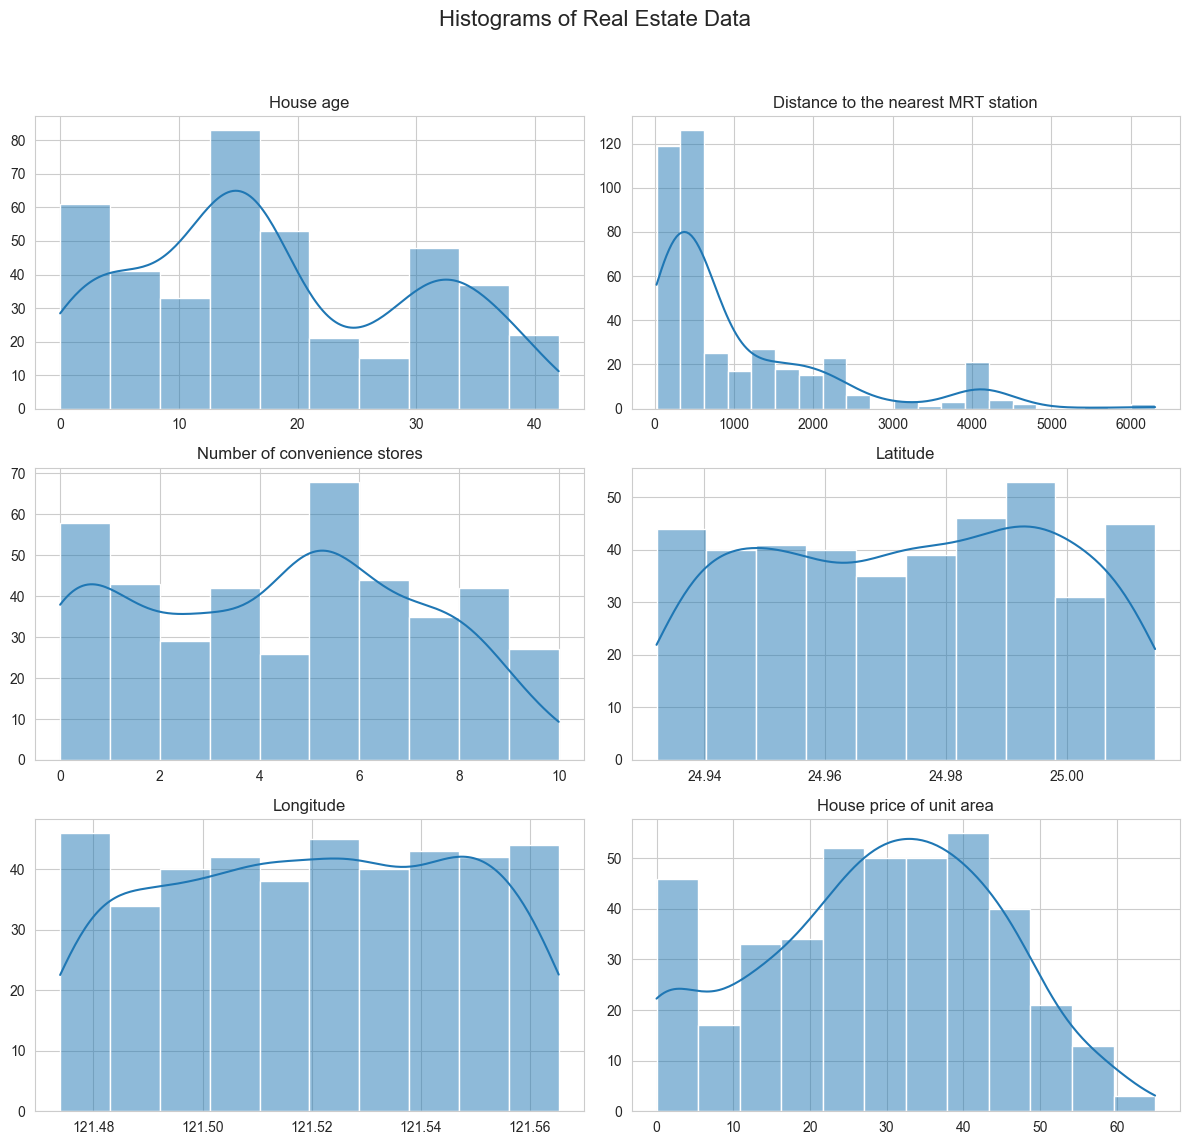

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores','Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(real_estate_data[col], ax=axes[i // 2, i % 2], kde=True)
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
    
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [25]:
print('Skewness of the target variable:', real_estate_data['House price of unit area'].skew())
print('Kurtosis of the target variable:', real_estate_data['House price of unit area'].kurt())

Skewness of the target variable: -0.20147281877596818
Kurtosis of the target variable: -0.7023073692027766


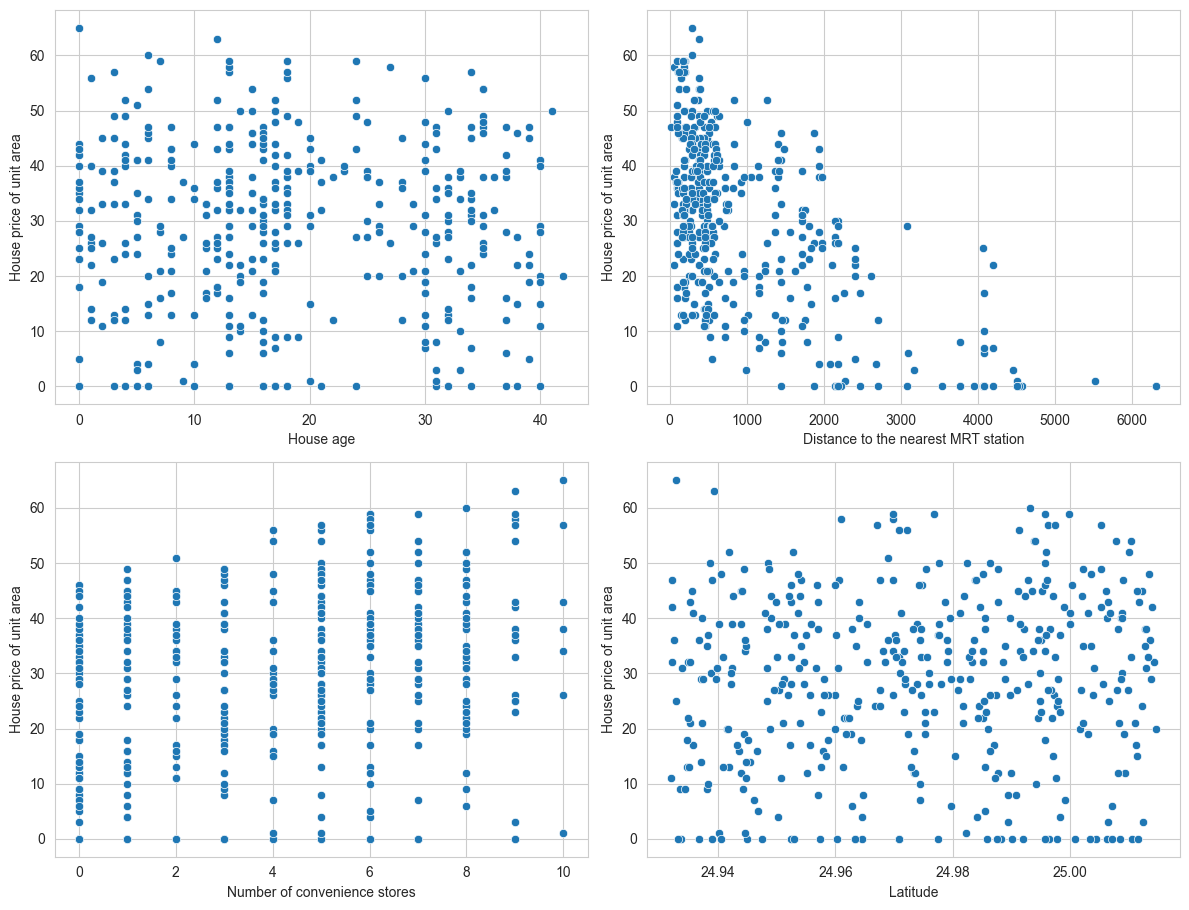

In [26]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Scatter plot for each variable against the house price
sns.scatterplot(data=real_estate_data, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=real_estate_data, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=real_estate_data, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=real_estate_data, x='Latitude', y='House price of unit area', ax=axes[1, 1])
# House price of unit area is the target variable

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Axes: >

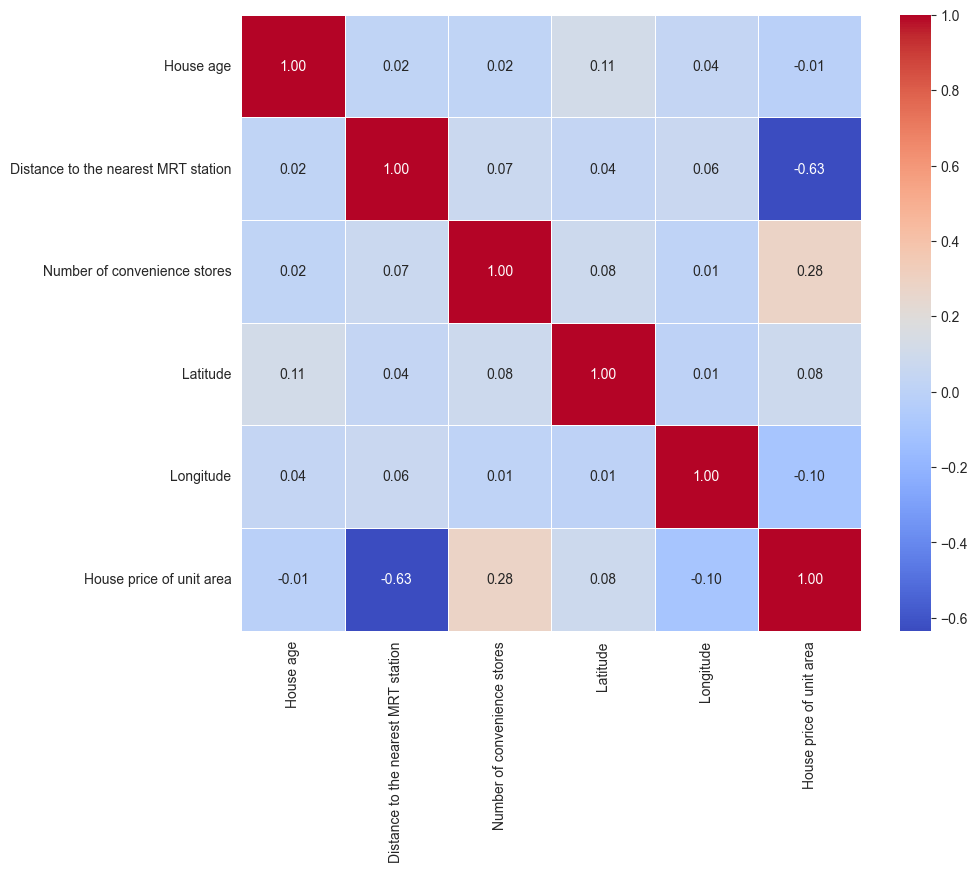

In [32]:
# Correlation matrix
corr_matrix = real_estate_data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

In [33]:
from sklearn.metrics import roc_auc_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Selecting features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = real_estate_data[features]
y = real_estate_data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y.size

414

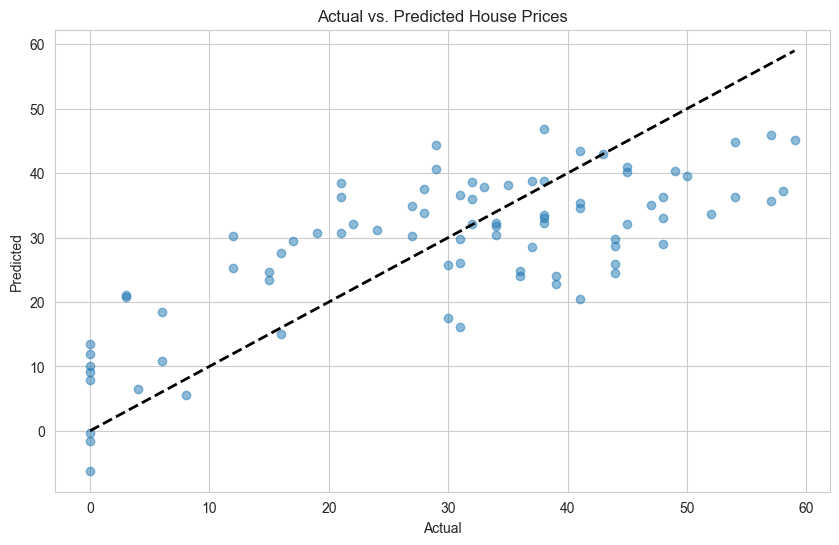

In [49]:
y_pred_lr = model.predict(X_test)

# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()